In [1]:
import pandas as pd
import numpy as np
from glob import glob  
import os
from collections import Counter
import pickle 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
%matplotlib inline

## PreProcessing

#### Building Data Frame [ 1: kotlin files]

In [2]:
# set the path to your file location
path=r'C:\Users\This PC\Others\blueOptima\kt'
# create a empty list, where you store the content
list_of_text = []
# create a empty list, where you store the content like values:frequency
freq_value=[]
# create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
freq=[]
# create a empty list, where you store the byte values
val=[]
# create a empty list, where you store the content like values:probability distribution - probalility frequency distribution value
prob_freq_dist_value=[]
# create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
prob_freq=[]
# create a empty list, where you store the byte values
prob_val=[]

"""
Created a helper method, that uses a Counter object and the length of the file contents, 
to adjust every byte value count by the number of bytes in the file. 
Inside of the helper method there is a generator function that loops over a Counter instance and applies the calculation.
As you will see we need to wrap the generator inside of a dict, so that the Counter does not count the frequency 
of value-frequency tuples, which are all going to be unique, 
but instead it will apply a dict to itself and allow us to use all the additional functionality that the Counter class offers.
"""

def probability_distribution(content):
    def _helper():
        absolute_distribution = Counter(content)
        length = len(content)
        for value, frequency in absolute_distribution.items():
            yield int(value), float(frequency) / length
    return Counter(dict(_helper()))

# loop over the files in the folder print("0x{:02x}: {}".format(value, frequency),len(val),"\n",text)
for file in os.listdir(path):
    # create a empty list, where you store the content like values:frequency
    freq_value=[]
    # create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
    freq=[]
    # create a empty list, where you store the byte values
    val=[]
    # create a empty list, where you store the content like values:probability distribution - probalility frequency distribution value
    prob_freq_dist_value=[]
    # create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
    prob_freq=[]
    # create a empty list, where you store the byte values
    prob_val=[]
    # open the file
    with open(os.path.join(path, file),"rb") as f:
        text = f.read()
        c = Counter(text)
        prob_dist_c=probability_distribution(text)
    #List the n most common elements and their counts from the most common to the least.  If n is None, then list all element counts.
    for prob_value, prob_dist_freq in prob_dist_c.most_common(n=10):
        prob_freq_dist_value.append("0x{:02x}: {:.04f}".format(prob_value, prob_dist_freq))
        prob_val.append("{:02x}".format(prob_value))
        prob_freq.append("{:.0%}".format(prob_dist_freq))
    #List the n most common elements and their counts from the most common to the least.  If n is None, then list all element counts.
    for value, frequency in c.most_common(n=10):
        freq_value.append("0x{:02x}: {}".format(value,frequency))
        val.append("{:02x}".format(value))
        freq.append("{}".format(frequency))
    list_of_text.append((c,val,freq,freq_value,prob_val,prob_freq,prob_freq_dist_value,text,file))
df_kt = pd.DataFrame(list_of_text, columns = ['OccurrenceOfByteContents','OnlyValueForAbsoluteDistribution','OnlyFrequency','Value:Frequency','OnlyValueForProbalilityDistribution','OnlyProbalilityDistribution','Value:ProbalilityDistribution','Text', 'Filename'])


print(df_kt.info())
print("*" * 80)
print(df_kt.memory_usage())
print("*" * 80)
df_kt.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   OccurrenceOfByteContents             998 non-null    object
 1   OnlyValueForAbsoluteDistribution     998 non-null    object
 2   OnlyFrequency                        998 non-null    object
 3   Value:Frequency                      998 non-null    object
 4   OnlyValueForProbalilityDistribution  998 non-null    object
 5   OnlyProbalilityDistribution          998 non-null    object
 6   Value:ProbalilityDistribution        998 non-null    object
 7   Text                                 998 non-null    object
 8   Filename                             998 non-null    object
dtypes: object(9)
memory usage: 70.3+ KB
None
********************************************************************************
Index                                   128
Occurrence

,OccurrenceOfByteContents,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:Frequency,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Value:ProbalilityDistribution,Text,Filename
0,"{47: 21, 42: 39, 10: 90, 32: 492, 67: 11, 111:...","[20, 65, 74, 69, 6e, 6f, 61, 6c, 0a, 72]","[492, 198, 182, 181, 158, 112, 107, 91, 90, 69]","[0x20: 492, 0x65: 198, 0x74: 182, 0x69: 181, 0...","[20, 65, 74, 69, 6e, 6f, 61, 6c, 0a, 72]","[18%, 7%, 7%, 7%, 6%, 4%, 4%, 3%, 3%, 2%]","[0x20: 0.1769, 0x65: 0.0712, 0x74: 0.0654, 0x6...",b'/*\n * Copyright (C) 2018 The Android Open S...,0.kt
1,"{112: 7, 97: 17, 99: 17, 107: 1, 103: 6, 101: ...","[20, 74, 6f, 65, 69, 6e, 61, 63, 64, 2e]","[40, 32, 28, 23, 23, 21, 17, 17, 15, 14]","[0x20: 40, 0x74: 32, 0x6f: 28, 0x65: 23, 0x69:...","[20, 74, 6f, 65, 69, 6e, 61, 63, 64, 2e]","[11%, 9%, 8%, 6%, 6%, 6%, 5%, 5%, 4%, 4%]","[0x20: 0.1072, 0x74: 0.0858, 0x6f: 0.0751, 0x6...",b'package com.trendyol.common\n\nimport androi...,1.kt


#### Building Data Frame [ 2: mak files]

In [3]:
# set the path to your file location
path=r'C:\Users\This PC\Others\blueOptima\mak'
# create a empty list, where you store the content
list_of_text = []
# create a empty list, where you store the content like values:frequency
freq_value=[]
# create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
freq=[]
# create a empty list, where you store the byte values
val=[]
# create a empty list, where you store the content like values:probability distribution - probalility frequency distribution value
prob_freq_dist_value=[]
# create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
prob_freq=[]
# create a empty list, where you store the byte values
prob_val=[]

"""
Created a helper method, that uses a Counter object and the length of the file contents, 
to adjust every byte value count by the number of bytes in the file. 
Inside of the helper method there is a generator function that loops over a Counter instance and applies the calculation.
As you will see we need to wrap the generator inside of a dict, so that the Counter does not count the frequency 
of value-frequency tuples, which are all going to be unique, 
but instead it will apply a dict to itself and allow us to use all the additional functionality that the Counter class offers.
"""

def probability_distribution(content):
    def _helper():
        absolute_distribution = Counter(content)
        length = len(content)
        for value, frequency in absolute_distribution.items():
            yield int(value), float(frequency) / length
    return Counter(dict(_helper()))

# loop over the files in the folder
for file in os.listdir(path):
    # create a empty list, where you store the content like values:frequency
    freq_value=[]
    # create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
    freq=[]
    # create a empty list, where you store the byte values
    val=[]
    # create a empty list, where you store the content like values:probability distribution - probalility frequency distribution value
    prob_freq_dist_value=[]
    # create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
    prob_freq=[]
    # create a empty list, where you store the byte values
    prob_val=[]
    # open the file
    with open(os.path.join(path, file),"rb") as f:
        text = f.read()
        c = Counter(text)
        prob_dist_c=probability_distribution(text)
    #List the n most common elements and their counts from the most common to the least.  If n is None, then list all element counts.
    for prob_value, prob_dist_freq in prob_dist_c.most_common(n=10):
        prob_freq_dist_value.append("0x{:02x}: {:.04f}".format(prob_value, prob_dist_freq))
        prob_val.append("{:02x}".format(prob_value))
        prob_freq.append("{:.0%}".format(prob_dist_freq))
    #List the n most common elements and their counts from the most common to the least.  If n is None, then list all element counts.
    for value, frequency in c.most_common(n=10):
        freq_value.append("0x{:02x}: {}".format(value,frequency))
        val.append("{:02x}".format(value))
        freq.append("{}".format(frequency))
    # append the text and filename
    list_of_text.append((c,freq_value,val,freq,prob_freq_dist_value,prob_val,prob_freq,text, file))
# create a dataframe and save
df_mak = pd.DataFrame(list_of_text, columns = ['OccurrenceOfByteContents','Value:Frequency','OnlyValueForAbsoluteDistribution','OnlyFrequency','Value:ProbalilityDistribution','OnlyValueForProbalilityDistribution','OnlyProbalilityDistribution','Text', 'Filename'])


print(df_mak.info())
print("*" * 80)
print(df_mak.memory_usage())
print("*" * 80)
df_mak.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   OccurrenceOfByteContents             96 non-null     object
 1   Value:Frequency                      96 non-null     object
 2   OnlyValueForAbsoluteDistribution     96 non-null     object
 3   OnlyFrequency                        96 non-null     object
 4   Value:ProbalilityDistribution        96 non-null     object
 5   OnlyValueForProbalilityDistribution  96 non-null     object
 6   OnlyProbalilityDistribution          96 non-null     object
 7   Text                                 96 non-null     object
 8   Filename                             96 non-null     object
dtypes: object(9)
memory usage: 6.9+ KB
None
********************************************************************************
Index                                  128
OccurrenceOfBy

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{35: 24, 32: 213, 116: 71, 104: 58, 101: 255, ...","[0x65: 255, 0x20: 213, 0x5f: 165, 0x6e: 150, 0...","[65, 20, 5f, 6e, 61, 69, 6c, 73, 67, 6d]","[255, 213, 165, 150, 129, 113, 109, 79, 79, 73]","[0x65: 0.0935, 0x20: 0.0781, 0x5f: 0.0605, 0x6...","[65, 20, 5f, 6e, 61, 69, 6c, 73, 67, 6d]","[9%, 8%, 6%, 6%, 5%, 4%, 4%, 3%, 3%, 3%]",b'# these are the variables your Makefile.am s...,0.mak
1,"{32: 1332, 35: 369, 13: 44, 10: 44, 67: 21, 10...","[0x20: 1332, 0x23: 369, 0x65: 74, 0x74: 72, 0x...","[20, 23, 65, 74, 2d, 6f, 69, 73, 72, 54]","[1332, 369, 74, 72, 68, 67, 67, 53, 51, 48]","[0x20: 0.4268, 0x23: 0.1182, 0x65: 0.0237, 0x7...","[20, 23, 65, 74, 2d, 6f, 69, 73, 72, 54]","[43%, 12%, 2%, 2%, 2%, 2%, 2%, 2%, 2%, 2%]","b"" ###########################################...",1.mak


#### Building Data Frame [ 3: ml files]

In [4]:
# set the path to your file location
path=r'C:\Users\This PC\Others\blueOptima\ml'
# create a empty list, where you store the content
list_of_text = []
# create a empty list, where you store the content like values:frequency
freq_value=[]
# create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
freq=[]
# create a empty list, where you store the byte values
val=[]
# create a empty list, where you store the content like values:probability distribution - probalility frequency distribution value
prob_freq_dist_value=[]
# create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
prob_freq=[]
# create a empty list, where you store the byte values
prob_val=[]

"""
Created a helper method, that uses a Counter object and the length of the file contents, 
to adjust every byte value count by the number of bytes in the file. 
Inside of the helper method there is a generator function that loops over a Counter instance and applies the calculation.
As you will see we need to wrap the generator inside of a dict, so that the Counter does not count the frequency 
of value-frequency tuples, which are all going to be unique, 
but instead it will apply a dict to itself and allow us to use all the additional functionality that the Counter class offers.
"""

def probability_distribution(content):
    def _helper():
        absolute_distribution = Counter(content)
        length = len(content)
        for value, frequency in absolute_distribution.items():
            yield int(value), float(frequency) / length
    return Counter(dict(_helper()))

# loop over the files in the folder
for file in os.listdir(path):
    # create a empty list, where you store the content like values:frequency
    freq_value=[]
    # create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
    freq=[]
    # create a empty list, where you store the byte values
    val=[]
    # create a empty list, where you store the content like values:probability distribution - probalility frequency distribution value
    prob_freq_dist_value=[]
    # create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
    prob_freq=[]
    # create a empty list, where you store the byte values
    prob_val=[]
    # open the file
    with open(os.path.join(path, file),"rb") as f:
        text = f.read()
        c = Counter(text)
        prob_dist_c=probability_distribution(text)
        #List the n most common elements and their counts from the most common to the least.  If n is None, then list all element counts.
        for prob_value, prob_dist_freq in prob_dist_c.most_common(n=10):
            prob_freq_dist_value.append("0x{:02x}: {:.04f}".format(prob_value, prob_dist_freq))
            prob_val.append("{:02x}".format(prob_value))
            prob_freq.append("{:.0%}".format(prob_dist_freq))
        #List the n most common elements and their counts from the most common to the least.  If n is None, then list all element counts.
        for value, frequency in c.most_common(n=10):
            freq_value.append("0x{:02x}: {}".format(value,frequency))
            val.append("{:02x}".format(value))
            freq.append("{}".format(frequency))
    # append the text and filename
    list_of_text.append((c,freq_value,val,freq,prob_freq_dist_value,prob_val,prob_freq,text, file))
# create a dataframe and save
df_ml = pd.DataFrame(list_of_text, columns = ['OccurrenceOfByteContents','Value:Frequency','OnlyValueForAbsoluteDistribution','OnlyFrequency','Value:ProbalilityDistribution','OnlyValueForProbalilityDistribution','OnlyProbalilityDistribution','Text', 'Filename'])


print(df_ml.info())
print("*" * 80)
print(df_ml.memory_usage())
print("*" * 80)
df_ml.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   OccurrenceOfByteContents             263 non-null    object
 1   Value:Frequency                      263 non-null    object
 2   OnlyValueForAbsoluteDistribution     263 non-null    object
 3   OnlyFrequency                        263 non-null    object
 4   Value:ProbalilityDistribution        263 non-null    object
 5   OnlyValueForProbalilityDistribution  263 non-null    object
 6   OnlyProbalilityDistribution          263 non-null    object
 7   Text                                 263 non-null    object
 8   Filename                             263 non-null    object
dtypes: object(9)
memory usage: 18.6+ KB
None
********************************************************************************
Index                                   128
Occurrence

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{40: 31, 42: 50, 32: 644, 67: 9, 111: 95, 112:...","[0x20: 644, 0x65: 193, 0x74: 158, 0x69: 157, 0...","[20, 65, 74, 69, 6e, 61, 72, 6c, 6f, 73]","[644, 193, 158, 157, 121, 114, 101, 99, 95, 89]","[0x20: 0.2264, 0x65: 0.0678, 0x74: 0.0555, 0x6...","[20, 65, 74, 69, 6e, 61, 72, 6c, 6f, 73]","[23%, 7%, 6%, 6%, 4%, 4%, 4%, 3%, 3%, 3%]","b""(* Copyright (C) 2005, HELM Team.\n * \n * T...",0.ml
1,"{111: 941, 112: 642, 101: 1741, 110: 1352, 32:...","[0x20: 4404, 0x65: 1741, 0x6e: 1352, 0x74: 132...","[20, 65, 6e, 74, 5f, 69, 72, 6f, 73, 61]","[4404, 1741, 1352, 1326, 1220, 1117, 1056, 941...","[0x20: 0.1860, 0x65: 0.0735, 0x6e: 0.0571, 0x7...","[20, 65, 6e, 74, 5f, 69, 72, 6f, 73, 61]","[19%, 7%, 6%, 6%, 5%, 5%, 4%, 4%, 4%, 3%]",b'open Printer\nopen CErrors\nopen Util\nopen ...,1.ml


#### Building Data Frame [ 4: rexx files]

In [5]:
# set the path to your file location
path=r'C:\Users\This PC\Others\blueOptima\rexx'
# create a empty list, where you store the content
list_of_text = []
# create a empty list, where you store the content like values:frequency
freq_value=[]
# create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
freq=[]
# create a empty list, where you store the byte values
val=[]
# create a empty list, where you store the content like values:probability distribution - probalility frequency distribution value
prob_freq_dist_value=[]
# create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
prob_freq=[]
# create a empty list, where you store the byte values
prob_val=[]

"""
Created a helper method, that uses a Counter object and the length of the file contents, 
to adjust every byte value count by the number of bytes in the file. 
Inside of the helper method there is a generator function that loops over a Counter instance and applies the calculation.
As you will see we need to wrap the generator inside of a dict, so that the Counter does not count the frequency 
of value-frequency tuples, which are all going to be unique, 
but instead it will apply a dict to itself and allow us to use all the additional functionality that the Counter class offers.
"""

def probability_distribution(content):
    def _helper():
        absolute_distribution = Counter(content)
        length = len(content)
        for value, frequency in absolute_distribution.items():
            yield int(value), float(frequency) / length
    return Counter(dict(_helper()))

# loop over the files in the folder
for file in os.listdir(path):
    # create a empty list, where you store the content like values:frequency
    freq_value=[]
    # create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
    freq=[]
    # create a empty list, where you store the byte values
    val=[]
    # create a empty list, where you store the content like values:probability distribution - probalility frequency distribution value
    prob_freq_dist_value=[]
    # create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
    prob_freq=[]
    # create a empty list, where you store the byte values
    prob_val=[]
    # open the file
    with open(os.path.join(path, file),"rb") as f:
        text = f.read()
        c = Counter(text)
        prob_dist_c=probability_distribution(text)
        #List the n most common elements and their counts from the most common to the least.  If n is None, then list all element counts.
        for prob_value, prob_dist_freq in prob_dist_c.most_common(n=10):
            prob_freq_dist_value.append("0x{:02x}: {:.04f}".format(prob_value, prob_dist_freq))
            prob_val.append("{:02x}".format(prob_value))
            prob_freq.append("{:.0%}".format(prob_dist_freq))
        #List the n most common elements and their counts from the most common to the least.  If n is None, then list all element counts.
        for value, frequency in c.most_common(n=10):
            freq_value.append("0x{:02x}: {}".format(value,frequency))
            val.append("{:02x}".format(value))
            freq.append("{}".format(frequency))
    # append the text and filename
    list_of_text.append((c,freq_value,val,freq,prob_freq_dist_value,prob_val,prob_freq,text, file))
# create a dataframe and save
df_rexx = pd.DataFrame(list_of_text, columns = ['OccurrenceOfByteContents','Value:Frequency','OnlyValueForAbsoluteDistribution','OnlyFrequency','Value:ProbalilityDistribution','OnlyValueForProbalilityDistribution','OnlyProbalilityDistribution','Text', 'Filename'])

print(df_rexx.info())
print("*" * 80)
print(df_rexx.memory_usage())
print("*" * 80)
df_rexx.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   OccurrenceOfByteContents             242 non-null    object
 1   Value:Frequency                      242 non-null    object
 2   OnlyValueForAbsoluteDistribution     242 non-null    object
 3   OnlyFrequency                        242 non-null    object
 4   Value:ProbalilityDistribution        242 non-null    object
 5   OnlyValueForProbalilityDistribution  242 non-null    object
 6   OnlyProbalilityDistribution          242 non-null    object
 7   Text                                 242 non-null    object
 8   Filename                             242 non-null    object
dtypes: object(9)
memory usage: 17.1+ KB
None
********************************************************************************
Index                                   128
Occurrence

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{47: 4, 42: 8, 32: 120, 80: 5, 68: 2, 87: 2, 8...","[0x20: 120, 0x27: 18, 0x0a: 17, 0x65: 16, 0x72...","[20, 27, 0a, 65, 72, 70, 74, 3a, 2a, 6f]","[120, 18, 17, 16, 15, 10, 9, 9, 8, 8]","[0x20: 0.3226, 0x27: 0.0484, 0x0a: 0.0457, 0x6...","[20, 27, 0a, 65, 72, 70, 74, 3a, 2a, 6f]","[32%, 5%, 5%, 4%, 4%, 3%, 2%, 2%, 2%, 2%]","b""/* PDWPRCEV REXX Process output of 'runp...",0.rexx
1,"{47: 8, 42: 230, 32: 496, 82: 15, 69: 11, 88: ...","[0x20: 496, 0x2a: 230, 0x61: 149, 0x6e: 139, 0...","[20, 2a, 61, 6e, 65, 74, 72, 69, 73, 75]","[496, 230, 149, 139, 136, 112, 107, 100, 90, 89]","[0x20: 0.1800, 0x2a: 0.0835, 0x61: 0.0541, 0x6...","[20, 2a, 61, 6e, 65, 74, 72, 69, 73, 75]","[18%, 8%, 5%, 5%, 5%, 4%, 4%, 4%, 3%, 3%]","b""/* REXX ************************************...",1.rexx


#### Building Data Frame [ 5: csproj files]

In [6]:
# set the path to your file location
path=r'C:\Users\This PC\Others\blueOptima\csproj'
# create a empty list, where you store the content
list_of_text = []
# create a empty list, where you store the content like values:frequency
freq_value=[]
# create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
freq=[]
# create a empty list, where you store the byte values
val=[]
# create a empty list, where you store the content like values:probability distribution - probalility frequency distribution value
prob_freq_dist_value=[]
# create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
prob_freq=[]
# create a empty list, where you store the byte values
prob_val=[]

"""
Created a helper method, that uses a Counter object and the length of the file contents, 
to adjust every byte value count by the number of bytes in the file. 
Inside of the helper method there is a generator function that loops over a Counter instance and applies the calculation.
As you will see we need to wrap the generator inside of a dict, so that the Counter does not count the frequency 
of value-frequency tuples, which are all going to be unique, 
but instead it will apply a dict to itself and allow us to use all the additional functionality that the Counter class offers.
"""

def probability_distribution(content):
    def _helper():
        absolute_distribution = Counter(content)
        length = len(content)
        for value, frequency in absolute_distribution.items():
            yield int(value), float(frequency) / length
    return Counter(dict(_helper()))

# loop over the files in the folder
for file in os.listdir(path):
    # create a empty list, where you store the content like values:frequency
    freq_value=[]
    # create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
    freq=[]
    # create a empty list, where you store the byte values
    val=[]
    # create a empty list, where you store the content like values:probability distribution - probalility frequency distribution value
    prob_freq_dist_value=[]
    # create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
    prob_freq=[]
    # create a empty list, where you store the byte values
    prob_val=[]
    # open the file
    with open(os.path.join(path, file),"rb") as f:
        text = f.read()
        c = Counter(text)
        prob_dist_c=probability_distribution(text)
        #List the n most common elements and their counts from the most common to the least.  If n is None, then list all element counts.
        for prob_value, prob_dist_freq in prob_dist_c.most_common(n=10):
            prob_freq_dist_value.append("0x{:02x}: {:.04f}".format(prob_value, prob_dist_freq))
            prob_val.append("{:02x}".format(prob_value))
            prob_freq.append("{:.0%}".format(prob_dist_freq))
        #List the n most common elements and their counts from the most common to the least.  If n is None, then list all element counts.
        for value, frequency in c.most_common(n=10):
            freq_value.append("0x{:02x}: {}".format(value,frequency))
            val.append("{:02x}".format(value))
            freq.append("{}".format(frequency))
    # append the text and filename
    list_of_text.append((c,freq_value,val,freq,prob_freq_dist_value,prob_val,prob_freq,text, file))

# create a dataframe and save
df_csproj = pd.DataFrame(list_of_text, columns = ['OccurrenceOfByteContents','Value:Frequency','OnlyValueForAbsoluteDistribution','OnlyFrequency','Value:ProbalilityDistribution','OnlyValueForProbalilityDistribution','OnlyProbalilityDistribution','Text', 'Filename'])

print(df_csproj.info())
print("*" * 80)
print(df_csproj.memory_usage())
print("*" * 80)
df_csproj.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   OccurrenceOfByteContents             235 non-null    object
 1   Value:Frequency                      235 non-null    object
 2   OnlyValueForAbsoluteDistribution     235 non-null    object
 3   OnlyFrequency                        235 non-null    object
 4   Value:ProbalilityDistribution        235 non-null    object
 5   OnlyValueForProbalilityDistribution  235 non-null    object
 6   OnlyProbalilityDistribution          235 non-null    object
 7   Text                                 235 non-null    object
 8   Filename                             235 non-null    object
dtypes: object(9)
memory usage: 16.6+ KB
None
********************************************************************************
Index                                   128
Occurrence

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{239: 1, 187: 1, 191: 1, 60: 22, 80: 16, 114: ...","[0x20: 43, 0x65: 42, 0x72: 40, 0x74: 39, 0x6f:...","[20, 65, 72, 74, 6f, 61, 3c, 3e, 75, 73]","[43, 42, 40, 39, 36, 27, 22, 22, 22, 21]","[0x20: 0.0692, 0x65: 0.0676, 0x72: 0.0644, 0x7...","[20, 65, 72, 74, 6f, 61, 3c, 3e, 75, 73]","[7%, 7%, 6%, 6%, 6%, 4%, 4%, 4%, 4%, 3%]","b'\xef\xbb\xbf<Project Sdk=""Microsoft.NET.Sdk""...",0.csproj
1,"{239: 1, 187: 1, 191: 1, 60: 29, 80: 21, 114: ...","[0x65: 152, 0x20: 113, 0x72: 83, 0x74: 76, 0x6...","[65, 20, 72, 74, 6f, 61, 6e, 63, 2e, 75]","[152, 113, 83, 76, 74, 67, 64, 54, 47, 44]","[0x65: 0.1086, 0x20: 0.0807, 0x72: 0.0593, 0x7...","[65, 20, 72, 74, 6f, 61, 6e, 63, 2e, 75]","[11%, 8%, 6%, 5%, 5%, 5%, 5%, 4%, 3%, 3%]","b'\xef\xbb\xbf<Project Sdk=""Microsoft.NET.Sdk""...",1.csproj


#### Building Data Frame [ 6: jenkinsfile files]

In [7]:
# set the path to your file location
path=r'C:\Users\This PC\Others\blueOptima\jenkinsfile'
# create a empty list, where you store the content
list_of_text = []
# create a empty list, where you store the content like values:frequency
freq_value=[]
# create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
freq=[]
# create a empty list, where you store the byte values
val=[]
# create a empty list, where you store the content like values:probability distribution - probalility frequency distribution value
prob_freq_dist_value=[]
# create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
prob_freq=[]
# create a empty list, where you store the byte values
prob_val=[]

"""
Created a helper method, that uses a Counter object and the length of the file contents, 
to adjust every byte value count by the number of bytes in the file. 
Inside of the helper method there is a generator function that loops over a Counter instance and applies the calculation.
As you will see we need to wrap the generator inside of a dict, so that the Counter does not count the frequency 
of value-frequency tuples, which are all going to be unique, 
but instead it will apply a dict to itself and allow us to use all the additional functionality that the Counter class offers.
"""

def probability_distribution(content):
    def _helper():
        absolute_distribution = Counter(content)
        length = len(content)
        for value, frequency in absolute_distribution.items():
            yield int(value), float(frequency) / length
    return Counter(dict(_helper()))

# loop over the files in the folder
for file in os.listdir(path):
    # create a empty list, where you store the content like values:frequency
    freq_value=[]
    # create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
    freq=[]
    # create a empty list, where you store the byte values
    val=[]
    # create a empty list, where you store the content like values:probability distribution - probalility frequency distribution value
    prob_freq_dist_value=[]
    # create a empty list, where you store the frequency of absolute distribution i.e., how many times a certain byte value occurs
    prob_freq=[]
    # create a empty list, where you store the byte values
    prob_val=[]
    # open the file
    with open(os.path.join(path, file),"rb") as f:
        text = f.read()
        c = Counter(text)
        prob_dist_c=probability_distribution(text)
        #List the n most common elements and their counts from the most common to the least.  If n is None, then list all element counts.
        for prob_value, prob_dist_freq in prob_dist_c.most_common(n=10):
            prob_freq_dist_value.append("0x{:02x}: {:.04f}".format(prob_value, prob_dist_freq))
            prob_val.append("{:02x}".format(prob_value))
            prob_freq.append("{:.0%}".format(prob_dist_freq))
        #List the n most common elements and their counts from the most common to the least.  If n is None, then list all element counts.
        for value, frequency in c.most_common(n=10):
            freq_value.append("0x{:02x}: {}".format(value,frequency))
            val.append("{:02x}".format(value))
            freq.append("{}".format(frequency))
    # append the text and filename
    list_of_text.append((c,freq_value,val,freq,prob_freq_dist_value,prob_val,prob_freq,text, file))

    
# create a dataframe and save
df_jenkinsfile = pd.DataFrame(list_of_text, columns = ['OccurrenceOfByteContents','Value:Frequency','OnlyValueForAbsoluteDistribution','OnlyFrequency','Value:ProbalilityDistribution','OnlyValueForProbalilityDistribution','OnlyProbalilityDistribution','Text', 'Filename'])

print(df_jenkinsfile.info())
print("*" * 80)
print(df_jenkinsfile.memory_usage())
print("*" * 80)
df_jenkinsfile.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   OccurrenceOfByteContents             249 non-null    object
 1   Value:Frequency                      249 non-null    object
 2   OnlyValueForAbsoluteDistribution     249 non-null    object
 3   OnlyFrequency                        249 non-null    object
 4   Value:ProbalilityDistribution        249 non-null    object
 5   OnlyValueForProbalilityDistribution  249 non-null    object
 6   OnlyProbalilityDistribution          249 non-null    object
 7   Text                                 249 non-null    object
 8   Filename                             249 non-null    object
dtypes: object(9)
memory usage: 17.6+ KB
None
********************************************************************************
Index                                   128
Occurrence

,OccurrenceOfByteContents,Value:Frequency,OnlyValueForAbsoluteDistribution,OnlyFrequency,Value:ProbalilityDistribution,OnlyValueForProbalilityDistribution,OnlyProbalilityDistribution,Text,Filename
0,"{74: 1, 101: 15, 110: 6, 107: 2, 105: 10, 115:...","[0x20: 83, 0x65: 15, 0x0a: 14, 0x69: 10, 0x73:...","[20, 65, 0a, 69, 73, 70, 6e, 61, 7b, 27]","[83, 15, 14, 10, 8, 8, 6, 6, 6, 6]","[0x20: 0.3934, 0x65: 0.0711, 0x0a: 0.0664, 0x6...","[20, 65, 0a, 69, 73, 70, 6e, 61, 7b, 27]","[39%, 7%, 7%, 5%, 4%, 4%, 3%, 3%, 3%, 3%]","b""Jenkinsfile (Declarative Pipeline)\n\npipeli...",0.jenkinsfile
1,"{110: 17, 111: 13, 100: 2, 101: 39, 32: 109, 1...","[0x20: 109, 0x65: 39, 0x74: 34, 0x73: 32, 0x22...","[20, 65, 74, 73, 22, 5c, 61, 6e, 6c, 75]","[109, 39, 34, 32, 30, 22, 19, 17, 16, 14]","[0x20: 0.2261, 0x65: 0.0809, 0x74: 0.0705, 0x7...","[20, 65, 74, 73, 22, 5c, 61, 6e, 6c, 75]","[23%, 8%, 7%, 7%, 6%, 5%, 4%, 4%, 3%, 3%]","b'node {\n test = ""<testsuite tests=\\""3\\""...",1.jenkinsfile


### Feature Scaling & some more preprocessing

In [8]:
##### For each DataFrame
final_df_jenkinsfile=df_jenkinsfile[['OnlyValueForAbsoluteDistribution','OnlyFrequency','OnlyProbalilityDistribution','Filename']].copy()
final_df_csproj=df_csproj[['OnlyValueForAbsoluteDistribution','OnlyFrequency','OnlyProbalilityDistribution','Filename']].copy()
final_df_rexx=df_rexx[['OnlyValueForAbsoluteDistribution','OnlyFrequency','OnlyProbalilityDistribution','Filename']].copy()
final_df_ml=df_ml[['OnlyValueForAbsoluteDistribution','OnlyFrequency','OnlyProbalilityDistribution','Filename']].copy()
final_df_mak=df_mak[['OnlyValueForAbsoluteDistribution','OnlyFrequency','OnlyProbalilityDistribution','Filename']].copy()
final_df_kt=df_kt[['OnlyValueForAbsoluteDistribution','OnlyFrequency','OnlyProbalilityDistribution','Filename']].copy()


In [9]:
final_df_csproj.head()

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,Filename
0,"[20, 65, 72, 74, 6f, 61, 3c, 3e, 75, 73]","[43, 42, 40, 39, 36, 27, 22, 22, 22, 21]","[7%, 7%, 6%, 6%, 6%, 4%, 4%, 4%, 4%, 3%]",0.csproj
1,"[65, 20, 72, 74, 6f, 61, 6e, 63, 2e, 75]","[152, 113, 83, 76, 74, 67, 64, 54, 47, 44]","[11%, 8%, 6%, 5%, 5%, 5%, 5%, 4%, 3%, 3%]",1.csproj
2,"[20, 65, 72, 6f, 2e, 63, 74, 0a, 22, 6e]","[47, 45, 41, 33, 22, 20, 18, 17, 16, 16]","[9%, 9%, 8%, 6%, 4%, 4%, 4%, 3%, 3%, 3%]",10.csproj
3,"[20, 65, 6f, 74, 72, 61, 69, 3c, 3e, 70]","[141, 105, 99, 91, 71, 59, 53, 51, 51, 44]","[10%, 8%, 7%, 7%, 5%, 4%, 4%, 4%, 4%, 3%]",100.csproj
4,"[20, 72, 65, 6f, 74, 0a, 3c, 3e, 70, 75]","[38, 31, 31, 26, 25, 17, 15, 15, 15, 11]","[10%, 8%, 8%, 6%, 6%, 4%, 4%, 4%, 4%, 3%]",101.csproj


In [10]:
# reset the index
final_df_jenkinsfile.reset_index(drop=True)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,Filename
0,"[20, 65, 0a, 69, 73, 70, 6e, 61, 7b, 27]","[83, 15, 14, 10, 8, 8, 6, 6, 6, 6]","[39%, 7%, 7%, 5%, 4%, 4%, 3%, 3%, 3%, 3%]",0.jenkinsfile
1,"[20, 65, 74, 73, 22, 5c, 61, 6e, 6c, 75]","[109, 39, 34, 32, 30, 22, 19, 17, 16, 14]","[23%, 8%, 7%, 7%, 6%, 5%, 4%, 4%, 3%, 3%]",1.jenkinsfile
2,"[20, 65, 73, 74, 6e, 69, 61, 6c, 0a, 75]","[291, 51, 42, 41, 30, 28, 25, 24, 24, 22]","[36%, 6%, 5%, 5%, 4%, 3%, 3%, 3%, 3%, 3%]",10.jenkinsfile
3,"[20, 65, 74, 72, 73, 6e, 61, 6f, 69, 6c]","[2472, 816, 559, 523, 477, 458, 439, 428, 425,...","[22%, 7%, 5%, 5%, 4%, 4%, 4%, 4%, 4%, 3%]",100.jenkinsfile
4,"[20, 73, 6f, 74, 69, 65, 61, 0a, 6e, 2f]","[234, 43, 40, 35, 30, 30, 26, 26, 24, 23]","[30%, 5%, 5%, 4%, 4%, 4%, 3%, 3%, 3%, 3%]",101.jenkinsfile
...,...,...,...,...
244,"[20, 65, 74, 69, 73, 72, 61, 0a, 6e, 6c]","[2413, 196, 161, 153, 121, 120, 110, 101, 96, 93]","[49%, 4%, 3%, 3%, 2%, 2%, 2%, 2%, 2%, 2%]",95.jenkinsfile
245,"[20, 3d, 65, 0a, 73, 74, 6f, 69, 6e, 70]","[101, 16, 15, 14, 10, 7, 7, 6, 6, 5]","[42%, 7%, 6%, 6%, 4%, 3%, 3%, 2%, 2%, 2%]",96.jenkinsfile
246,"[20, 2f, 65, 0a, 73, 6c, 61, 74, 69, 72]","[231, 97, 36, 33, 21, 21, 19, 19, 16, 16]","[34%, 14%, 5%, 5%, 3%, 3%, 3%, 3%, 2%, 2%]",97.jenkinsfile
247,"[20, 65, 74, 73, 6e, 61, 63, 69, 27, 75]","[414, 88, 64, 59, 56, 47, 44, 44, 42, 42]","[27%, 6%, 4%, 4%, 4%, 3%, 3%, 3%, 3%, 3%]",98.jenkinsfile


In [11]:
final_df_csproj.reset_index(drop=True)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,Filename
0,"[20, 65, 72, 74, 6f, 61, 3c, 3e, 75, 73]","[43, 42, 40, 39, 36, 27, 22, 22, 22, 21]","[7%, 7%, 6%, 6%, 6%, 4%, 4%, 4%, 4%, 3%]",0.csproj
1,"[65, 20, 72, 74, 6f, 61, 6e, 63, 2e, 75]","[152, 113, 83, 76, 74, 67, 64, 54, 47, 44]","[11%, 8%, 6%, 5%, 5%, 5%, 5%, 4%, 3%, 3%]",1.csproj
2,"[20, 65, 72, 6f, 2e, 63, 74, 0a, 22, 6e]","[47, 45, 41, 33, 22, 20, 18, 17, 16, 16]","[9%, 9%, 8%, 6%, 4%, 4%, 4%, 3%, 3%, 3%]",10.csproj
3,"[20, 65, 6f, 74, 72, 61, 69, 3c, 3e, 70]","[141, 105, 99, 91, 71, 59, 53, 51, 51, 44]","[10%, 8%, 7%, 7%, 5%, 4%, 4%, 4%, 4%, 3%]",100.csproj
4,"[20, 72, 65, 6f, 74, 0a, 3c, 3e, 70, 75]","[38, 31, 31, 26, 25, 17, 15, 15, 15, 11]","[10%, 8%, 8%, 6%, 6%, 4%, 4%, 4%, 4%, 3%]",101.csproj
...,...,...,...,...
230,"[20, 72, 65, 74, 6f, 2e, 6e, 0a, 61, 3c]","[46, 42, 41, 32, 29, 23, 20, 19, 18, 16]","[9%, 8%, 8%, 6%, 5%, 4%, 4%, 4%, 3%, 3%]",95.csproj
231,"[65, 20, 72, 73, 6e, 61, 74, 6f, 22, 63]","[90, 58, 42, 41, 41, 37, 36, 34, 34, 27]","[12%, 7%, 5%, 5%, 5%, 5%, 5%, 4%, 4%, 3%]",96.csproj
232,"[00, 65, 20, 72, 6e, 6f, 74, 73, 63, 22]","[1029, 103, 100, 47, 42, 41, 40, 39, 36, 34]","[50%, 5%, 5%, 2%, 2%, 2%, 2%, 2%, 2%, 2%]",97.csproj
233,"[20, 65, 72, 6f, 6e, 2e, 74, 63, 69, 0a]","[67, 66, 54, 49, 34, 32, 31, 28, 27, 24]","[9%, 9%, 7%, 7%, 5%, 4%, 4%, 4%, 4%, 3%]",98.csproj


In [12]:
final_df_rexx.reset_index(drop=True)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,Filename
0,"[20, 27, 0a, 65, 72, 70, 74, 3a, 2a, 6f]","[120, 18, 17, 16, 15, 10, 9, 9, 8, 8]","[32%, 5%, 5%, 4%, 4%, 3%, 2%, 2%, 2%, 2%]",0.rexx
1,"[20, 2a, 61, 6e, 65, 74, 72, 69, 73, 75]","[496, 230, 149, 139, 136, 112, 107, 100, 90, 89]","[18%, 8%, 5%, 5%, 5%, 4%, 4%, 4%, 3%, 3%]",1.rexx
2,"[20, 6f, 65, 61, 72, 2f, 2a, 74, 73, 69]","[261, 26, 24, 22, 20, 18, 18, 18, 15, 14]","[42%, 4%, 4%, 4%, 3%, 3%, 3%, 3%, 2%, 2%]",10.rexx
3,"[20, 61, 27, 2e, 73, 65, 69, 6f, 7c, 6c]","[26, 14, 14, 10, 10, 9, 9, 8, 8, 7]","[13%, 7%, 7%, 5%, 5%, 5%, 5%, 4%, 4%, 4%]",100.rexx
4,[],[],[],101.rexx
...,...,...,...,...
237,"[20, 6e, 69, 74, 6c, 75, 0a, 70, 6f, 3d]","[10, 9, 8, 6, 5, 4, 4, 3, 2, 2]","[15%, 13%, 12%, 9%, 7%, 6%, 6%, 4%, 3%, 3%]",95.rexx
238,"[20, 72, 65, 74, 0a, 69, 70, 6d, 61, 73]","[72, 18, 17, 16, 14, 10, 9, 8, 8, 8]","[25%, 6%, 6%, 6%, 5%, 4%, 3%, 3%, 3%, 3%]",96.rexx
239,"[20, 65, 6e, 73, 74, 72, 61, 6f, 2f, 2a]","[2319, 244, 176, 167, 156, 143, 142, 138, 124,...","[42%, 4%, 3%, 3%, 3%, 3%, 3%, 2%, 2%, 2%]",97.rexx
240,"[20, 61, 65, 72, 73, 74, 64, 6f, 69, 2f]","[211, 19, 19, 17, 16, 15, 13, 11, 11, 10]","[46%, 4%, 4%, 4%, 4%, 3%, 3%, 2%, 2%, 2%]",98.rexx


In [13]:
final_df_ml.reset_index(drop=True)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,Filename
0,"[20, 65, 74, 69, 6e, 61, 72, 6c, 6f, 73]","[644, 193, 158, 157, 121, 114, 101, 99, 95, 89]","[23%, 7%, 6%, 6%, 4%, 4%, 4%, 3%, 3%, 3%]",0.ml
1,"[20, 65, 6e, 74, 5f, 69, 72, 6f, 73, 61]","[4404, 1741, 1352, 1326, 1220, 1117, 1056, 941...","[19%, 7%, 6%, 6%, 5%, 5%, 4%, 4%, 4%, 3%]",1.ml
2,"[20, 65, 69, 6d, 6f, 6e, 2e, 0a, 74, 6c]","[1273, 380, 287, 280, 274, 254, 248, 225, 225,...","[21%, 6%, 5%, 5%, 4%, 4%, 4%, 4%, 4%, 3%]",10.ml
3,"[20, 6e, 65, 74, 66, 69, 61, 6c, 0a, 73]","[149, 46, 42, 33, 33, 30, 28, 23, 21, 20]","[22%, 7%, 6%, 5%, 5%, 4%, 4%, 3%, 3%, 3%]",100.ml
4,"[20, 65, 6e, 74, 61, 69, 0a, 64, 2e, 73]","[2009, 634, 478, 465, 345, 335, 312, 277, 267,...","[23%, 7%, 5%, 5%, 4%, 4%, 4%, 3%, 3%, 3%]",101.ml
...,...,...,...,...
258,"[20, 74, 69, 6e, 72, 2a, 70, 5f, 73, 0a]","[1104, 320, 309, 296, 259, 225, 210, 195, 192,...","[21%, 6%, 6%, 6%, 5%, 4%, 4%, 4%, 4%, 3%]",95.ml
259,"[20, 74, 73, 65, 0a, 61, 22, 6f, 75, 6e]","[87, 40, 33, 27, 21, 17, 14, 13, 13, 12]","[21%, 10%, 8%, 6%, 5%, 4%, 3%, 3%, 3%, 3%]",96.ml
260,"[20, 6e, 74, 65, 73, 72, 6f, 63, 0a, 69]","[414, 151, 135, 109, 95, 88, 86, 70, 69, 66]","[18%, 7%, 6%, 5%, 4%, 4%, 4%, 3%, 3%, 3%]",97.ml
261,"[20, 65, 74, 61, 6c, 0a, 76, 6e, 28, 29]","[627, 223, 140, 132, 121, 116, 101, 91, 88, 88]","[22%, 8%, 5%, 5%, 4%, 4%, 4%, 3%, 3%, 3%]",98.ml


In [14]:
final_df_mak.reset_index(drop=True)


,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,Filename
0,"[65, 20, 5f, 6e, 61, 69, 6c, 73, 67, 6d]","[255, 213, 165, 150, 129, 113, 109, 79, 79, 73]","[9%, 8%, 6%, 6%, 5%, 4%, 4%, 3%, 3%, 3%]",0.mak
1,"[20, 23, 65, 74, 2d, 6f, 69, 73, 72, 54]","[1332, 369, 74, 72, 68, 67, 67, 53, 51, 48]","[43%, 12%, 2%, 2%, 2%, 2%, 2%, 2%, 2%, 2%]",1.mak
2,"[61, 20, 2d, 73, 65, 41, 6c, 74, 70, 63]","[365, 301, 258, 217, 206, 165, 158, 158, 136, ...","[8%, 6%, 5%, 4%, 4%, 3%, 3%, 3%, 3%, 3%]",10.mak
3,"[23, 20, 65, 74, 69, 0d, 0a, 73, 61, 6f]","[573, 436, 221, 135, 127, 114, 114, 111, 105, ...","[17%, 13%, 6%, 4%, 4%, 3%, 3%, 3%, 3%, 3%]",11.mak
4,"[20, 0d, 65, 69, 74, 6f, 0a, 6e, 61, 73]","[29643, 9678, 7070, 6230, 6079, 5399, 4838, 46...","[19%, 6%, 4%, 4%, 4%, 3%, 3%, 3%, 3%, 3%]",12.mak
...,...,...,...,...
91,"[5f, 45, 0d, 24, 28, 29, 2d, 42, 20, 74]","[621, 570, 506, 457, 456, 456, 437, 398, 389, ...","[5%, 5%, 4%, 4%, 4%, 4%, 4%, 4%, 3%, 3%]",91.mak
92,"[20, 65, 74, 6f, 72, 61, 69, 6e, 0d, 0a]","[505, 284, 197, 193, 155, 146, 142, 132, 125, ...","[13%, 7%, 5%, 5%, 4%, 4%, 4%, 3%, 3%, 3%]",92.mak
93,"[20, 2d, 65, 0d, 0a, 69, 6c, 74, 6f, 73]","[3019, 2544, 722, 671, 671, 663, 601, 536, 528...","[15%, 12%, 3%, 3%, 3%, 3%, 3%, 3%, 3%, 3%]",93.mak
94,"[2d, 20, 23, 0d, 0a, 69, 65, 6f, 6e, 74]","[1433, 857, 715, 692, 346, 304, 304, 243, 216,...","[15%, 9%, 7%, 7%, 4%, 3%, 3%, 3%, 2%, 2%]",94.mak


In [15]:
final_df_kt.reset_index(drop=True)


,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,Filename
0,"[20, 65, 74, 69, 6e, 6f, 61, 6c, 0a, 72]","[492, 198, 182, 181, 158, 112, 107, 91, 90, 69]","[18%, 7%, 7%, 7%, 6%, 4%, 4%, 3%, 3%, 2%]",0.kt
1,"[20, 74, 6f, 65, 69, 6e, 61, 63, 64, 2e]","[40, 32, 28, 23, 23, 21, 17, 17, 15, 14]","[11%, 9%, 8%, 6%, 6%, 6%, 5%, 5%, 4%, 4%]",1.kt
2,"[20, 65, 74, 72, 69, 61, 6e, 6f, 73, 2e]","[420, 222, 199, 168, 165, 164, 149, 143, 104, ...","[15%, 8%, 7%, 6%, 6%, 6%, 5%, 5%, 4%, 4%]",10.kt
3,"[20, 6e, 61, 69, 65, 74, 0a, 6f, 72, 6d]","[93, 32, 30, 29, 28, 25, 24, 24, 23, 19]","[16%, 5%, 5%, 5%, 5%, 4%, 4%, 4%, 4%, 3%]",100.kt
4,"[20, 65, 74, 6f, 69, 61, 73, 72, 6e, 0a]","[321, 135, 121, 107, 96, 96, 95, 91, 76, 57]","[16%, 7%, 6%, 5%, 5%, 5%, 5%, 5%, 4%, 3%]",101.kt
...,...,...,...,...
993,"[65, 20, 74, 72, 73, 61, 69, 6e, 6f, 2e]","[212, 178, 161, 135, 111, 109, 106, 101, 76, 75]","[10%, 9%, 8%, 6%, 5%, 5%, 5%, 5%, 4%, 4%]",993.kt
994,"[6f, 65, 70, 69, 61, 20, 72, 74, 2e, 6d]","[174, 148, 128, 127, 119, 99, 94, 93, 87, 83]","[9%, 8%, 7%, 7%, 6%, 5%, 5%, 5%, 5%, 4%]",994.kt
995,"[20, 65, 61, 6e, 73, 69, 74, 72, 6c, 62]","[68, 46, 23, 21, 20, 19, 19, 17, 16, 16]","[16%, 11%, 5%, 5%, 5%, 4%, 4%, 4%, 4%, 4%]",995.kt
996,"[65, 6f, 20, 64, 74, 61, 72, 6c, 0a, 63]","[57, 57, 55, 44, 43, 42, 35, 33, 23, 23]","[8%, 8%, 8%, 6%, 6%, 6%, 5%, 5%, 3%, 3%]",996.kt


In [16]:
#As all columns have the same number of lists, you can call Series.explode on each column
final_df_jenkinsfile=final_df_jenkinsfile.set_index(['Filename']).apply(pd.Series.explode).reset_index()
final_df_csproj=final_df_csproj.set_index(['Filename']).apply(pd.Series.explode).reset_index()
final_df_rexx=final_df_rexx.set_index(['Filename']).apply(pd.Series.explode).reset_index()
final_df_ml=final_df_ml.set_index(['Filename']).apply(pd.Series.explode).reset_index()
final_df_mak=final_df_mak.set_index(['Filename']).apply(pd.Series.explode).reset_index()
final_df_kt=final_df_kt.set_index(['Filename']).apply(pd.Series.explode).reset_index()

In [17]:
final_df_kt.reset_index(drop=True)

,Filename,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution
0,0.kt,20,492,18%
1,0.kt,65,198,7%
2,0.kt,74,182,7%
3,0.kt,69,181,7%
4,0.kt,6e,158,6%
...,...,...,...,...
9840,997.kt,0a,14,6%
9841,997.kt,69,13,5%
9842,997.kt,6c,12,5%
9843,997.kt,67,9,4%


In [18]:
# getting the target for my model from the filename
final_df_jenkinsfile['ClassName'] = final_df_jenkinsfile['Filename'].str.split('.').str[-1]
final_df_csproj['ClassName'] = final_df_csproj['Filename'].str.split('.').str[-1]
final_df_rexx['ClassName'] = final_df_rexx['Filename'].str.split('.').str[-1]
final_df_ml['ClassName'] = final_df_ml['Filename'].str.split('.').str[-1]
final_df_mak['ClassName'] = final_df_mak['Filename'].str.split('.').str[-1]
final_df_kt['ClassName'] = final_df_kt['Filename'].str.split('.').str[-1]

In [19]:
final_df_kt.reset_index(drop=True)

,Filename,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,0.kt,20,492,18%,kt
1,0.kt,65,198,7%,kt
2,0.kt,74,182,7%,kt
3,0.kt,69,181,7%,kt
4,0.kt,6e,158,6%,kt
...,...,...,...,...,...
9840,997.kt,0a,14,6%,kt
9841,997.kt,69,13,5%,kt
9842,997.kt,6c,12,5%,kt
9843,997.kt,67,9,4%,kt


In [20]:
# removing the % sign present near data in the column probabilistic percentage
final_df_jenkinsfile=final_df_jenkinsfile.replace('\%','',regex=True)
final_df_csproj=final_df_csproj.replace('\%','',regex=True)
final_df_rexx=final_df_rexx.replace('\%','',regex=True)
final_df_ml=final_df_ml.replace('\%','',regex=True)
final_df_mak=final_df_mak.replace('\%','',regex=True)
final_df_kt=final_df_kt.replace('\%','',regex=True)

In [21]:
final_df_kt.head()

,Filename,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,0.kt,20,492,18,kt
1,0.kt,65,198,7,kt
2,0.kt,74,182,7,kt
3,0.kt,69,181,7,kt
4,0.kt,6e,158,6,kt


In [22]:
##### For each DataFrame
fdf_jenkinsfile=final_df_jenkinsfile[['OnlyValueForAbsoluteDistribution','OnlyFrequency','OnlyProbalilityDistribution','ClassName']].copy()
fdf_csproj=final_df_csproj[['OnlyValueForAbsoluteDistribution','OnlyFrequency','OnlyProbalilityDistribution','ClassName']].copy()
fdf_rexx=final_df_rexx[['OnlyValueForAbsoluteDistribution','OnlyFrequency','OnlyProbalilityDistribution','ClassName']].copy()
fdf_ml=final_df_ml[['OnlyValueForAbsoluteDistribution','OnlyFrequency','OnlyProbalilityDistribution','ClassName']].copy()
fdf_mak=final_df_mak[['OnlyValueForAbsoluteDistribution','OnlyFrequency','OnlyProbalilityDistribution','ClassName']].copy()
fdf_kt=final_df_kt[['OnlyValueForAbsoluteDistribution','OnlyFrequency','OnlyProbalilityDistribution','ClassName']].copy()

In [23]:
fdf_kt.head()

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,20,492,18,kt
1,65,198,7,kt
2,74,182,7,kt
3,69,181,7,kt
4,6e,158,6,kt


In [24]:
#replacing all infinite values with nan and than nan with 0
fdf_jenkinsfile.replace([np.inf, -np.inf], np.nan, inplace=True)
fdf_jenkinsfile['OnlyFrequency'].fillna(fdf_jenkinsfile['OnlyFrequency'].mode()[0], inplace=True)
fdf_jenkinsfile['OnlyProbalilityDistribution'].fillna(fdf_jenkinsfile['OnlyProbalilityDistribution'].mode()[0], inplace=True)
fdf_jenkinsfile.fillna(0, inplace=True)

fdf_csproj.replace([np.inf, -np.inf], np.nan, inplace=True)
fdf_csproj['OnlyFrequency'].fillna(fdf_csproj['OnlyFrequency'].mode()[0], inplace=True)
fdf_csproj['OnlyProbalilityDistribution'].fillna(fdf_csproj['OnlyProbalilityDistribution'].mode()[0], inplace=True)
fdf_csproj.fillna(0, inplace=True)

fdf_rexx.replace([np.inf, -np.inf], np.nan, inplace=True)
fdf_rexx['OnlyFrequency'].fillna(fdf_rexx['OnlyFrequency'].mode()[0], inplace=True)
fdf_rexx['OnlyProbalilityDistribution'].fillna(fdf_rexx['OnlyProbalilityDistribution'].mode()[0], inplace=True)
fdf_rexx.fillna(0, inplace=True)

fdf_ml.replace([np.inf, -np.inf], np.nan, inplace=True)
fdf_ml['OnlyFrequency'].fillna(fdf_ml['OnlyFrequency'].mode()[0], inplace=True)
fdf_ml['OnlyProbalilityDistribution'].fillna(fdf_ml['OnlyProbalilityDistribution'].mode()[0], inplace=True)
fdf_ml.fillna(0, inplace=True)

fdf_mak.replace([np.inf, -np.inf], np.nan, inplace=True)
fdf_mak['OnlyFrequency'].fillna(fdf_mak['OnlyFrequency'].mode()[0], inplace=True)
fdf_mak['OnlyProbalilityDistribution'].fillna(fdf_mak['OnlyProbalilityDistribution'].mode()[0], inplace=True)
fdf_mak.fillna(0, inplace=True)

fdf_kt.replace([np.inf, -np.inf], np.nan, inplace=True)
fdf_kt['OnlyFrequency'].fillna(fdf_kt['OnlyFrequency'].mode()[0], inplace=True)
fdf_kt['OnlyProbalilityDistribution'].fillna(fdf_kt['OnlyProbalilityDistribution'].mode()[0], inplace=True)
fdf_kt.fillna(0, inplace=True)

In [25]:
fdf_kt.head()

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,20,492,18,kt
1,65,198,7,kt
2,74,182,7,kt
3,69,181,7,kt
4,6e,158,6,kt


In [26]:
fdf_kt.head()

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,20,492,18,kt
1,65,198,7,kt
2,74,182,7,kt
3,69,181,7,kt
4,6e,158,6,kt


In [27]:
#converting all non-numeric data in column OnlyValueForAbsoluteDistribution to numeric type

In [28]:
fdf_jenkinsfile = fdf_jenkinsfile[pd.to_numeric(fdf_jenkinsfile['OnlyValueForAbsoluteDistribution'], errors='coerce').notnull()]
fdf_jenkinsfile['OnlyValueForAbsoluteDistribution'] = fdf_jenkinsfile['OnlyValueForAbsoluteDistribution'].astype(int)

In [29]:
fdf_csproj = fdf_csproj[pd.to_numeric(fdf_csproj['OnlyValueForAbsoluteDistribution'], errors='coerce').notnull()]
fdf_csproj['OnlyValueForAbsoluteDistribution'] = fdf_csproj['OnlyValueForAbsoluteDistribution'].astype(int)

In [30]:
fdf_rexx = fdf_rexx[pd.to_numeric(fdf_rexx['OnlyValueForAbsoluteDistribution'], errors='coerce').notnull()]
fdf_rexx['OnlyValueForAbsoluteDistribution'] = fdf_rexx['OnlyValueForAbsoluteDistribution'].astype(int)

In [31]:
fdf_ml = fdf_ml[pd.to_numeric(fdf_ml['OnlyValueForAbsoluteDistribution'], errors='coerce').notnull()]
fdf_ml['OnlyValueForAbsoluteDistribution'] = fdf_ml['OnlyValueForAbsoluteDistribution'].astype(int)

In [32]:
fdf_kt = fdf_kt[pd.to_numeric(fdf_kt['OnlyValueForAbsoluteDistribution'], errors='coerce').notnull()]
fdf_kt['OnlyValueForAbsoluteDistribution'] = fdf_kt['OnlyValueForAbsoluteDistribution'].astype(int)

In [33]:
fdf_mak = fdf_mak[pd.to_numeric(fdf_mak['OnlyValueForAbsoluteDistribution'], errors='coerce').notnull()]
fdf_mak['OnlyValueForAbsoluteDistribution'] = fdf_mak['OnlyValueForAbsoluteDistribution'].astype(int)

In [34]:
#changing data types of columns for each file type
fdf_jenkinsfile['OnlyValueForAbsoluteDistribution']=fdf_jenkinsfile.OnlyValueForAbsoluteDistribution.astype(int)
fdf_jenkinsfile['OnlyFrequency']=fdf_jenkinsfile.OnlyFrequency.astype(int)
fdf_jenkinsfile['OnlyProbalilityDistribution']=fdf_jenkinsfile.OnlyProbalilityDistribution.astype(int)

fdf_csproj['OnlyValueForAbsoluteDistribution']=fdf_csproj.OnlyValueForAbsoluteDistribution.astype(int)
fdf_csproj['OnlyFrequency']=fdf_csproj.OnlyFrequency.astype(int)
fdf_csproj['OnlyProbalilityDistribution']=fdf_csproj.OnlyProbalilityDistribution.astype(int)

fdf_rexx['OnlyValueForAbsoluteDistribution']=fdf_rexx.OnlyValueForAbsoluteDistribution.astype(int)
fdf_rexx['OnlyFrequency']=fdf_rexx.OnlyFrequency.astype(int)
fdf_rexx['OnlyProbalilityDistribution']=fdf_rexx.OnlyProbalilityDistribution.astype(int)

fdf_ml['OnlyValueForAbsoluteDistribution']=fdf_ml.OnlyValueForAbsoluteDistribution.astype(int)
fdf_ml['OnlyFrequency']=fdf_ml.OnlyFrequency.astype(int)
fdf_ml['OnlyProbalilityDistribution']=fdf_ml.OnlyProbalilityDistribution.astype(int)

fdf_mak['OnlyValueForAbsoluteDistribution']=fdf_mak.OnlyValueForAbsoluteDistribution.astype(int)
fdf_mak['OnlyFrequency']=fdf_mak.OnlyFrequency.astype(int)
fdf_mak['OnlyProbalilityDistribution']=fdf_mak.OnlyProbalilityDistribution.astype(int)

fdf_kt['OnlyValueForAbsoluteDistribution']=fdf_kt.OnlyValueForAbsoluteDistribution.astype(int)
fdf_kt['OnlyFrequency']=fdf_kt.OnlyFrequency.astype(int)
fdf_kt['OnlyProbalilityDistribution']=fdf_kt.OnlyProbalilityDistribution.astype(int)

##  Splitting above data frames to form train, validation and test data frame

In [35]:
print((fdf_kt.shape,fdf_mak.shape,fdf_ml.shape,fdf_rexx.shape,fdf_csproj.shape,fdf_jenkinsfile.shape))

((6889, 4), (631, 4), (1720, 4), (1681, 4), (1520, 4), (1724, 4))


##### Train and Test dataframe for kt files

In [36]:
df_kt_train, df_kt_test = train_test_split(fdf_kt, test_size=0.3)
df_kt_train.reset_index(drop=True).head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,20,55,10,kt
1,61,584,5,kt


In [37]:
df_kt_test.reset_index(drop=True).head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,63,16,3,kt
1,20,69,27,kt


##### Train and Test dataframe for mak files

In [38]:
df_mak_train, df_mak_test = train_test_split(fdf_mak, test_size=0.3)
df_mak_train.reset_index(drop=True).head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,65,304,3,mak
1,69,137,3,mak


In [39]:
df_mak_test.reset_index(drop=True).head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,54,263,5,mak
1,74,228,3,mak


##### Train and Test dataframe for ml files

In [40]:
df_ml_train, df_ml_test = train_test_split(fdf_ml, test_size=0.3)
df_ml_train.reset_index(drop=True).head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,28,73,8,ml
1,20,359,19,ml


In [41]:
df_ml_test.reset_index(drop=True).head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,69,802,6,ml
1,65,12,9,ml


##### Train and Test dataframe for rexx files

In [42]:
df_rexx_train, df_rexx_test = train_test_split(fdf_rexx, test_size=0.3)
df_rexx_train.reset_index(drop=True).head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,20,251,46,rexx
1,69,36,6,rexx


In [43]:
df_rexx_test.reset_index(drop=True).head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,94,87,4,rexx
1,73,21,2,rexx


##### Train and Test dataframe for csproj files

In [44]:
df_csproj_train, df_csproj_test = train_test_split(fdf_csproj, test_size=0.3)
df_csproj_train.reset_index(drop=True).head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,61,19,3,csproj
1,61,98,3,csproj


In [45]:
df_csproj_test.reset_index(drop=True).head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,20,71,10,csproj
1,63,196,3,csproj


##### Train and Test dataframe for jenkinsfile files

In [46]:
df_jenkinsfile_train, df_jenkinsfile_test = train_test_split(fdf_jenkinsfile, test_size=0.2)
df_jenkinsfile_train.reset_index(drop=True).head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,65,57,5,jenkinsfile
1,69,14,2,jenkinsfile


In [47]:
df_jenkinsfile_test.reset_index(drop=True).head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,65,160,6,jenkinsfile
1,61,57,2,jenkinsfile


In [48]:
print((df_kt_train.shape,df_mak_train.shape,df_ml_train.shape,df_rexx_train.shape,df_csproj_train.shape,df_jenkinsfile_train.shape))

((4822, 4), (441, 4), (1204, 4), (1176, 4), (1064, 4), (1379, 4))


In [49]:
print((df_kt_test.shape,df_mak_test.shape,df_ml_test.shape,df_rexx_test.shape,df_csproj_test.shape,df_jenkinsfile_test.shape))

((2067, 4), (190, 4), (516, 4), (505, 4), (456, 4), (345, 4))


### Building the train data frame

In [50]:
frames = [df_jenkinsfile_train,df_csproj_train,df_rexx_train,df_ml_train,df_mak_train,df_kt_train]

train_df = pd.concat(frames)
print(train_df.shape)
train_df.reset_index(drop=True).head(2)

(10086, 4)


,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,65,57,5,jenkinsfile
1,69,14,2,jenkinsfile


In [51]:
train_df.reset_index(drop=True).tail(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
10084,73,39,3,kt
10085,65,52,7,kt


### Validation data frame and Test data frame

##### Validation and Test dataframe for jenkinsfile files

In [52]:
df_jenkinsfile_val, df_jenkinsfile_test = train_test_split(df_jenkinsfile_test, test_size=0.1)
df_jenkinsfile_val.reset_index(drop=True).head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,74,28,6,jenkinsfile
1,65,81,4,jenkinsfile


In [53]:
df_jenkinsfile_test.reset_index(drop=True).head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,65,2799,4,jenkinsfile
1,69,131,3,jenkinsfile


##### Validation and Test dataframe for csproj files

In [54]:
df_csproj_val, df_csproj_test = train_test_split(df_csproj_test, test_size=0.1)
df_csproj_val.reset_index(drop=True).head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,74,35,4,csproj
1,70,105,4,csproj


In [55]:
df_csproj_test.reset_index(drop=True).head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,75,67,4,csproj
1,63,22,4,csproj


##### Validation and Test dataframe for rexx files

In [56]:
df_rexx_val, df_rexx_test = train_test_split(df_rexx_test, test_size=0.1)
df_rexx_val.reset_index(drop=True).head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,20,2890,52,rexx
1,74,68,2,rexx


In [57]:
df_rexx_test.reset_index(drop=True).head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,75,4,4,rexx
1,65,83,4,rexx


##### Validation and Test dataframe for ml files

In [58]:
df_ml_val, df_ml_test = train_test_split(df_ml_test, test_size=0.1)
df_ml_val.reset_index(drop=True).head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,74,1203,7,ml
1,20,52,21,ml


In [59]:
df_ml_test.reset_index(drop=True).head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,73,505,3,ml
1,20,5484,26,ml


##### Validation and Test dataframe for mak files

In [60]:
df_mak_val, df_mak_test = train_test_split(df_mak_test, test_size=0.1)
df_mak_val.reset_index(drop=True).head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,20,436,13,mak
1,45,176,4,mak


In [61]:
df_mak_test.reset_index(drop=True).head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,69,97,3,mak
1,65,74,2,mak


##### Validation and Test dataframe for kt files

In [62]:
df_kt_val, df_kt_test = train_test_split(df_kt_test, test_size=0.1)
df_kt_val.reset_index(drop=True).head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,72,72,4,kt
1,69,39,6,kt


In [63]:
df_kt_test.reset_index(drop=True).head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,63,20,3,kt
1,73,103,3,kt


### Building Validation data frame and Test data frame

In [64]:
frames = [df_jenkinsfile_val,df_csproj_val,df_rexx_val,df_ml_val,df_mak_val,df_kt_val]

val_df = pd.concat(frames)
print(val_df.shape)
val_df.reset_index(drop=True).head(2)

(3669, 4)


,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,74,28,6,jenkinsfile
1,65,81,4,jenkinsfile


In [65]:
frames = [df_jenkinsfile_test,df_csproj_test,df_rexx_test,df_ml_test,df_mak_test,df_kt_test]

test_df = pd.concat(frames)
print(test_df.shape)
test_df.reset_index(drop=True).head(2)

(410, 4)


,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,65,2799,4,jenkinsfile
1,69,131,3,jenkinsfile


In [66]:
print(train_df.shape)
train_df.reset_index(drop=True).head(2)

(10086, 4)


,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,65,57,5,jenkinsfile
1,69,14,2,jenkinsfile


## Feature Scaling 

Normalization is scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.
[ X'=(X-Xmin)/(Xmax-Xmin) ] Xmax and Xmin are the maximum and the minimum values of the feature respectively.
When the value of X is the minimum value in the column, the numerator will be 0, and hence X’ is 0.On the other hand, when the value of X is the maximum value in the column, the numerator is equal to the denominator and thus the value of X’ is 1
If the value of X is between the minimum and the maximum value, then the value of X’ is between 0 and 1


Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.
Mu is the mean of the feature values and Sigma is the standard deviation of the feature values. Note that in this case, the values are not restricted to a particular range. [X' = (X-Mu)/Sigma] Unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

##### Standardization 

In [67]:
from sklearn.preprocessing import StandardScaler

# decision_function_shape='ovr',kernel='poly',C=20,degree=3

# numerical features
num_cols = ['OnlyValueForAbsoluteDistribution','OnlyFrequency','OnlyProbalilityDistribution']

# apply standardization on numerical features
for i in num_cols:  
    # fit on training data column
    scale = StandardScaler().fit(train_df[[i]])
    
    # transform the training data column
    train_df[i] = scale.transform(train_df[[i]])
    
    # transform the validation data column
    val_df[i] = scale.transform(val_df[[i]])
    
    # transform the testing data column
    test_df[i] = scale.transform(test_df[[i]])

In [68]:
train_df.reset_index(drop=True).head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,0.262693,-0.198835,-0.293864,jenkinsfile
1,0.468454,-0.237632,-0.712140,jenkinsfile


In [69]:
val_df.reset_index(drop=True).head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,0.725655,-0.225000,-0.154438,jenkinsfile
1,0.262693,-0.177181,-0.433289,jenkinsfile


In [70]:
test_df.reset_index(drop=True).head(2)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName
0,0.262693,2.275129,-0.433289,jenkinsfile
1,0.468454,-0.132069,-0.572715,jenkinsfile


In [71]:
y_test=test_df['ClassName']
y_val=val_df['ClassName']
y_train=train_df['ClassName']

In [72]:
ftrain_df=train_df[['OnlyValueForAbsoluteDistribution','OnlyFrequency','OnlyProbalilityDistribution']].copy()
fval_df=val_df[['OnlyValueForAbsoluteDistribution','OnlyFrequency','OnlyProbalilityDistribution']].copy()
ftest_df=test_df[['OnlyValueForAbsoluteDistribution','OnlyFrequency','OnlyProbalilityDistribution']].copy()

In [73]:
ftrain_df.reset_index(drop=True).head()

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution
0,0.262693,-0.198835,-0.293864
1,0.468454,-0.237632,-0.712140
2,0.725655,0.146726,-0.154438
3,0.262693,-0.204249,-0.154438
4,-1.949232,-0.230414,-0.712140


In [74]:
fval_df.reset_index(drop=True).head()

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution
0,0.725655,-0.225000,-0.154438
1,0.262693,-0.177181,-0.433289
2,0.262693,-0.211467,-0.154438
3,-0.766109,-0.184399,-0.572715
4,0.056933,-0.198835,-0.712140


In [75]:
ftest_df.reset_index(drop=True).head()

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution
0,0.262693,2.275129,-0.433289
1,0.468454,-0.132069,-0.572715
2,0.725655,-0.243947,-0.712140
3,0.674214,-0.226805,-0.154438
4,0.519894,-0.238534,-0.572715


## EDA

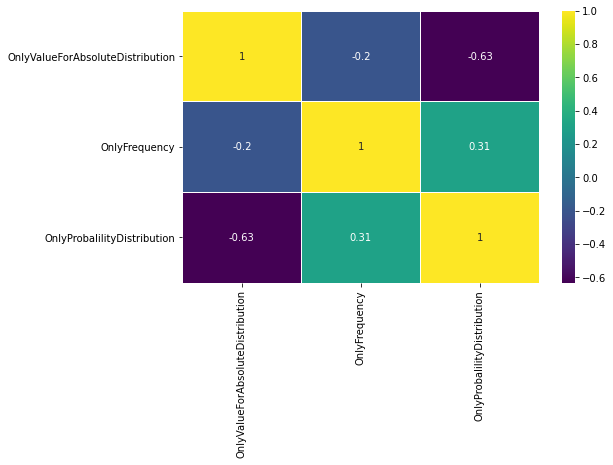

In [76]:
#analyse the train set using a Multivariate Analysis techniques i.e. Correlation matrix 
cormat=ftrain_df.corr()
plt.figure(figsize=(8,5))
g= sns.heatmap(cormat,annot=True,cmap='viridis',linewidths=.5)

<AxesSubplot:xlabel='ClassName', ylabel='OnlyFrequency'>

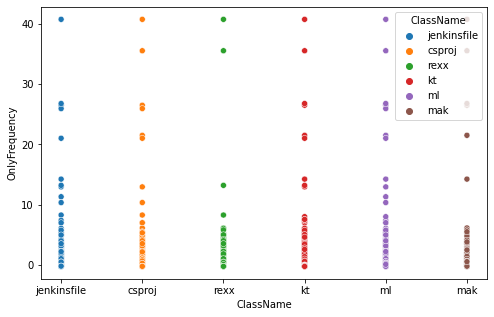

In [77]:
final_train_set=ftrain_df.join(y_train)

plt.figure(figsize=(8,5))
sns.scatterplot(y='OnlyFrequency', x='ClassName', data=final_train_set, hue='ClassName')

<AxesSubplot:xlabel='ClassName', ylabel='OnlyProbalilityDistribution'>

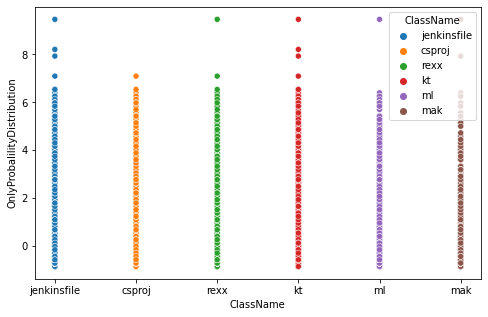

In [78]:
plt.figure(figsize=(8,5))
sns.scatterplot(y='OnlyProbalilityDistribution', x='ClassName', data=final_train_set, hue='ClassName')

<AxesSubplot:xlabel='OnlyProbalilityDistribution', ylabel='ClassName'>

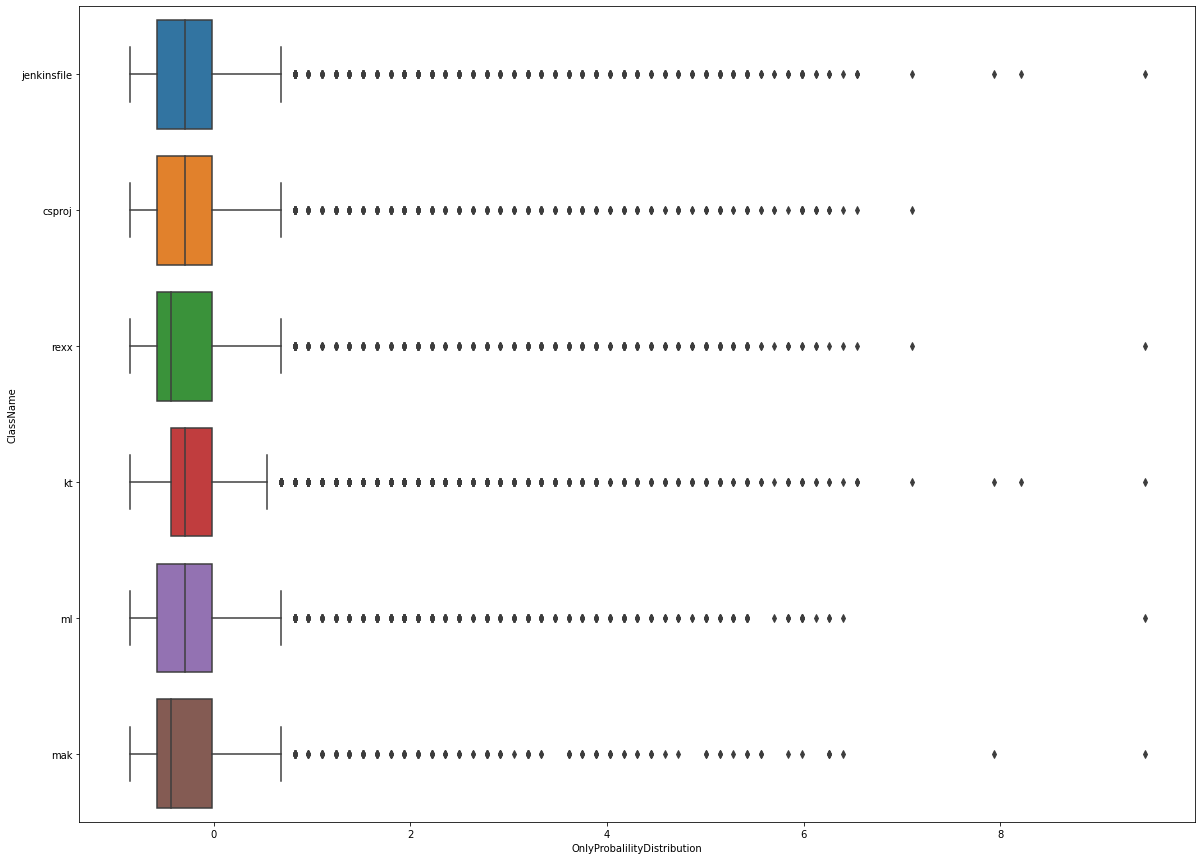

In [79]:
plt.figure(figsize=(20,15))
sns.boxplot(x=final_train_set['OnlyProbalilityDistribution'],y=final_train_set['ClassName'])

<AxesSubplot:xlabel='OnlyFrequency', ylabel='ClassName'>

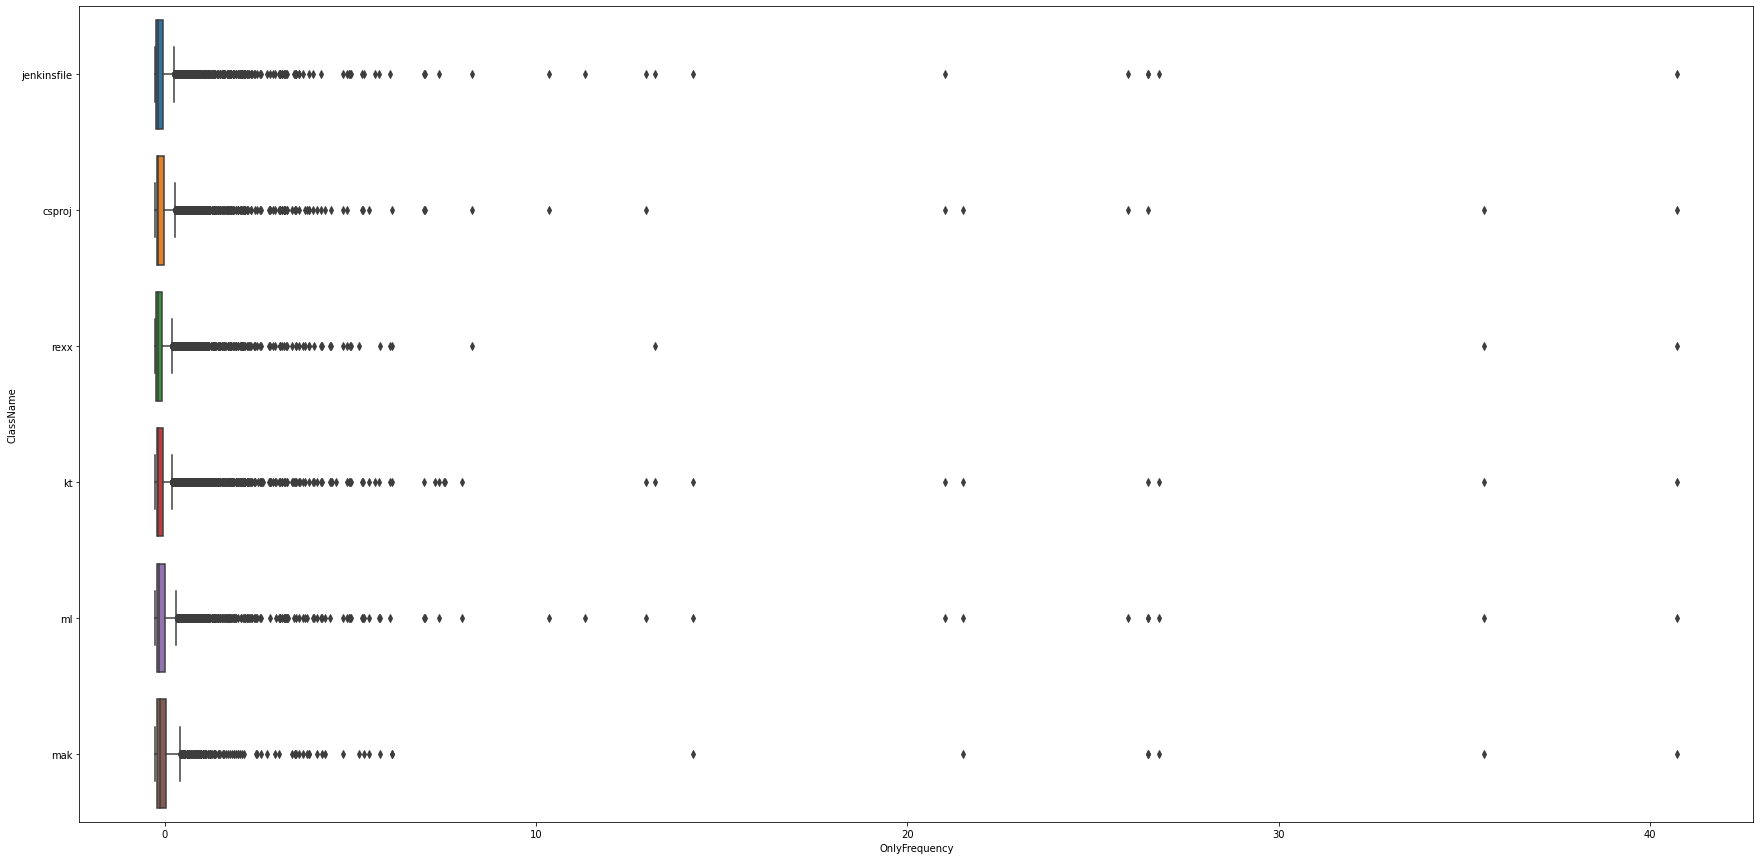

In [80]:
plt.figure(figsize=(30,15))
sns.boxplot(x=final_train_set['OnlyFrequency'],y=final_train_set['ClassName'])

## Feature Engineering

In [81]:
final_val_set=fval_df.join(y_val)
final_test_set=ftest_df.join(y_test)

final_train_set['encoded_ClassName']= preprocessing.LabelEncoder().fit_transform(final_train_set['ClassName'])
final_y_train=final_train_set['encoded_ClassName']

final_val_set['encoded_ClassName']= preprocessing.LabelEncoder().fit_transform(final_val_set['ClassName'])
final_y_val=final_val_set['encoded_ClassName']

final_test_set['encoded_ClassName']= preprocessing.LabelEncoder().fit_transform(final_test_set['ClassName'])
final_y_test=final_test_set['encoded_ClassName']

In [82]:
final_train_set.reset_index(drop=True).head(100)

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution,ClassName,encoded_ClassName
0,-2.052112,-0.175377,4.446605,jenkinsfile,1
1,-2.052112,-0.175377,4.446605,csproj,0
2,-2.052112,-0.175377,4.446605,rexx,5
3,-2.052112,-0.175377,4.446605,kt,2
4,-2.052112,-0.211467,-0.015013,jenkinsfile,1
...,...,...,...,...,...
95,-2.052112,-0.151918,2.215796,rexx,5
96,-2.052112,-0.151918,2.215796,ml,4
97,-2.052112,-0.151918,2.215796,mak,3
98,-2.052112,-0.151918,2.215796,kt,2


## Feature Selection

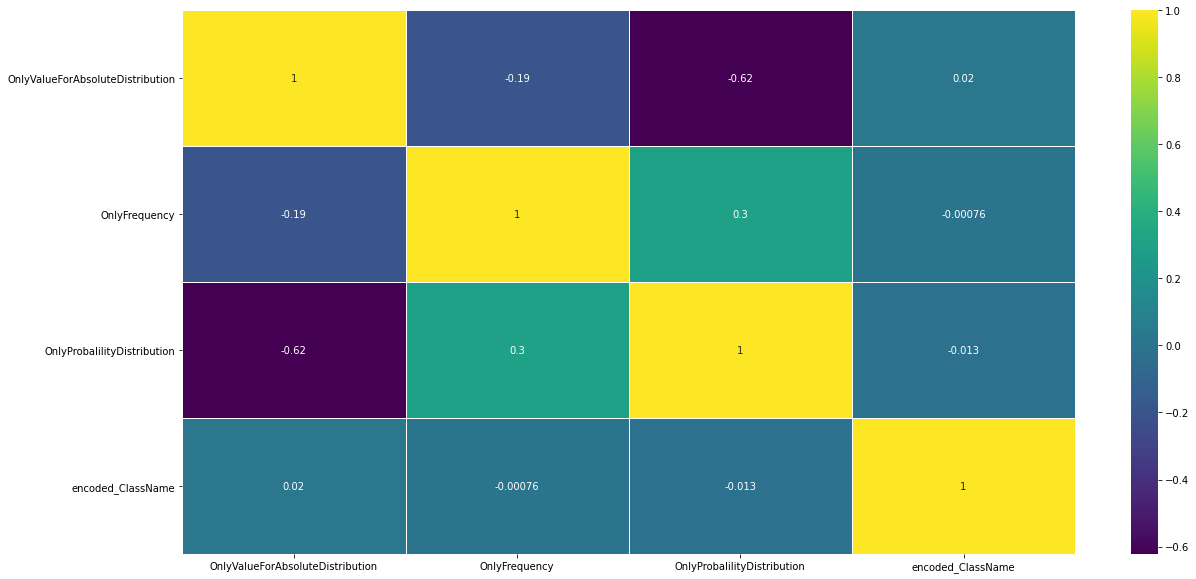

In [83]:
cormat=final_train_set.corr()
plt.figure(figsize=(20,10))
g= sns.heatmap(cormat,annot=True,cmap='viridis',linewidths=.5)

### Building Model

##### SVM

In [84]:
#Fitting Support Vector Classifer to the Training set
svmclassifier = SVC(C=10,kernel='rbf')
svmclassifier.fit(ftrain_df, y_train)
# Predicting the Test set results
y_val_pred = svmclassifier.predict(fval_df)
y_train_pred = svmclassifier.predict(ftrain_df)
y_test_pred = svmclassifier.predict(ftest_df)
# Accuracy on the Train set results                              
print('\n'+'-'*20+'Accuracy Score on the Train set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_train,y_train_pred)))
# Accuracy on the Validation set results                              
print('\n'+'-'*20+'Accuracy Score on the Validation set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_val,y_val_pred)))
# Accuracy on the Test set results                              
print('\n'+'-'*20+'Accuracy Score on the Test set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_test,y_test_pred)))


--------------------Accuracy Score on the Train set--------------------
54%

--------------------Accuracy Score on the Validation set--------------------
56%

--------------------Accuracy Score on the Test set--------------------
56%


In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

      csproj       0.67      0.04      0.08        46
 jenkinsfile       0.45      0.14      0.22        35
          kt       0.57      0.98      0.72       207
         mak       0.60      0.16      0.25        19
          ml       0.43      0.06      0.10        52
        rexx       0.52      0.27      0.36        51

    accuracy                           0.56       410
   macro avg       0.54      0.28      0.29       410
weighted avg       0.55      0.56      0.46       410



#### Logistic Regression

In [86]:
# Fitting Logistic Regression to the Training set
logclassifier = LogisticRegression(max_iter=90000)
print(logclassifier)
logclassifier.fit(ftrain_df, y_train)

y_val_pred = logclassifier.predict(fval_df)
y_train_pred = logclassifier.predict(ftrain_df)
y_test_pred = logclassifier.predict(ftest_df)
# Accuracy on the Train set results                              
print('\n'+'-'*20+'Accuracy Score on the Train set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_train,y_train_pred)))
# Accuracy on the Validation set results                              
print('\n'+'-'*20+'Accuracy Score on the Validation set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_val,y_val_pred)))
# Accuracy on the Test set results                              
print('\n'+'-'*20+'Accuracy Score on the Test set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_test,y_test_pred)))

LogisticRegression(max_iter=90000)

--------------------Accuracy Score on the Train set--------------------
48%

--------------------Accuracy Score on the Validation set--------------------
51%

--------------------Accuracy Score on the Test set--------------------
50%


#### KNN

In [87]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=100)

# Train the model using the training sets
model.fit(ftrain_df,y_train)

#Predict Output
y_val_pred = model.predict(fval_df)
y_train_pred = model.predict(ftrain_df)
y_test_pred = model.predict(ftest_df)
# Accuracy on the Train set results                              
print('\n'+'-'*20+'Accuracy Score on the Train set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_train,y_train_pred)))
# Accuracy on the Validation set results                              
print('\n'+'-'*20+'Accuracy Score on the Validation set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_val,y_val_pred)))
# Accuracy on the Test set results                              
print('\n'+'-'*20+'Accuracy Score on the Test set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_test,y_test_pred)))


--------------------Accuracy Score on the Train set--------------------
55%

--------------------Accuracy Score on the Validation set--------------------
57%

--------------------Accuracy Score on the Test set--------------------
57%



#### Random Forest Classifier

In [88]:
# Fitting Random Forest Classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
rfclassifier = RandomForestClassifier()
print(rfclassifier)
rfclassifier.fit(ftrain_df, y_train)

y_val_pred = rfclassifier.predict(fval_df)
y_train_pred = rfclassifier.predict(ftrain_df)
y_test_pred = rfclassifier.predict(ftest_df)
# Accuracy on the Train set results                              
print('\n'+'-'*20+'Accuracy Score on the Train set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_train,y_train_pred)))
# Accuracy on the Validation set results                              
print('\n'+'-'*20+'Accuracy Score on the Validation set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_val,y_val_pred)))
# Accuracy on the Test set results                              
print('\n'+'-'*20+'Accuracy Score on the Test set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_test,y_test_pred)))

RandomForestClassifier()

--------------------Accuracy Score on the Train set--------------------
88%

--------------------Accuracy Score on the Validation set--------------------
51%

--------------------Accuracy Score on the Test set--------------------
52%


##### Checking of a self-made file and its data

In [89]:
data = [[20,45,5]]
new_df = pd.DataFrame(data, columns=['OnlyValueForAbsoluteDistribution','OnlyFrequency','OnlyProbalilityDistribution'])

In [90]:
new_df

,OnlyValueForAbsoluteDistribution,OnlyFrequency,OnlyProbalilityDistribution
0,20,45,5


In [91]:
print(svmclassifier.predict(new_df))

['rexx']


### Save the model built using SVM

In [92]:
filename='modelfinal.sav'

In [93]:
pickle.dump(svmclassifier, open(filename, 'wb'))

In [94]:
#trying to load the model back again and test on the above self made data
load_model = pickle.load(open(filename,'rb'))

In [95]:
print(load_model.score(ftest_df,y_test))

0.5609756097560976
